In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from ruamel.yaml import YAML
import ruamel
from check_consistency import check_consistency, generate_photo_yaml_entries
from PhotoData import phidrates, MPI_Mainz, Leiden

yaml = ruamel.yaml.YAML()

In [2]:
dirs = os.listdir()

for i in range(len(dirs)):
    if os.path.isdir(dirs[i]):
        dirs1 = os.listdir(dirs[i])
        tmp = ['_=>' in f for f in dirs1]
        if np.any(tmp):
            for j in range(len(tmp)):
                if tmp[j]:
                    newname = dirs1[j].replace('>','')
                    os.rename(dirs[i]+'/'+dirs1[j],dirs[i]+'/'+newname) 
#                     os.delete()


    #     break
        
    

In [19]:
os.path.isdir(dirs[i])

False

FileNotFoundError: [Errno 2] No such file or directory: 'guru99.txt' -> 'career.guru99.txt'

In [5]:
check_consistency()

metadata.yaml is consistent with the data files.


In [4]:
fil = open('metadata.yaml','r')
meta = yaml.load(fil)
fil.close()

In [5]:
prx = []
for key in meta.keys():
    if key != "overall-notes":
        for key1 in meta[key]['reactions'].keys():
            prx.append(key1)

In [6]:
fil = open('../reaction_mechanisms/zahnle_earth.yaml','r')
zahnle = yaml.load(fil)
fil.close()

In [7]:
names = []
for i in range(len(zahnle['species'])):
    names.append(zahnle['species'][i]['name'])
prx = []
for i in range(len(zahnle['reactions'])):
    if 'hv' in zahnle['reactions'][i]['equation']:
        prx.append(zahnle['reactions'][i])

In [8]:
psp = []
for i in range(len(prx)):
    psp.append(prx[i]['equation'].split()[0].strip())
psp = list(set(psp))

In [26]:
check = list(set(names).difference(psp))

In [10]:
prx_all = generate_photo_yaml_entries(names)

In [11]:
new = []
for rx in prx_all:
    found = False
    for rx1 in prx:
        if rx1['equation'] == rx['equation']:
            found = True
            break
    if not found:
        new.append(rx)

In [12]:
prx = []
for i in range(len(apl['reactions'])):
    if 'hv' in apl['reactions'][i]['equation']:
        prx.append(apl['reactions'][i]['equation'].split()[0].strip())

NameError: name 'apl' is not defined

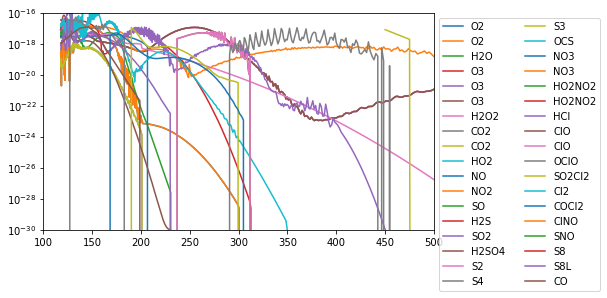

In [39]:

fig,ax = plt.subplots(1,1,figsize=[7,4])
for p in prx:
    try:
        atmos = mpi.get_atmos_data(p,output=True)
        ax.plot(atmos['alinc'][0],atmos['alinc'][1],label=p)
    except:
        pass
        
ax.set_yscale('log')

ax.legend(ncol=2,bbox_to_anchor=(1,1.0),loc='upper left')

ax.set_ylim(1e-30,1e-16)
ax.set_xlim(100,500)
plt.show()

In [14]:
fil = open('new.yaml','w')
yaml.dump(new,fil)
fil.close()

In [2]:
mpi = MPI_Mainz('SO2')

In [47]:
wv, xs = np.loadtxt('HO2NO2/HO2NO2_xs.txt',skiprows=2).T
atmos = mpi.get_atmos_data('HO2NO2',output=True)

In [50]:
atmos['alinc']

[[], []]

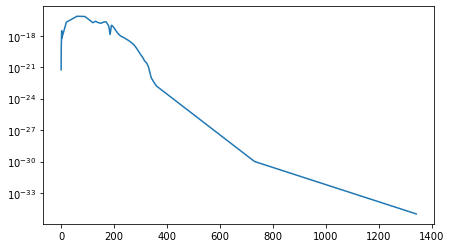

In [49]:
fig,ax = plt.subplots(1,1,figsize=[7,4])

ax.plot(wv,xs)
ax.plot(atmos['alinc'][0],atmos['alinc'][1],'--')

ax.set_yscale('log')

# ax.set_ylim(1e-30,1e-15)
# ax.set_xlim(100,500)
plt.show()

In [21]:
atmos['alinc']

[[117.79000000000002,
  117.92000000000002,
  118.06,
  118.2,
  118.34000000000002,
  118.48,
  118.62,
  118.75999999999999,
  118.91,
  119.05000000000001,
  119.19000000000001,
  119.33,
  119.47000000000001,
  119.62,
  119.75999999999999,
  119.9,
  120.05000000000001,
  120.19000000000001,
  120.34000000000002,
  120.48,
  120.63,
  120.77000000000001,
  120.92000000000002,
  121.07000000000001,
  121.21,
  121.36,
  121.50999999999999,
  121.65,
  121.80000000000001,
  121.95,
  122.10000000000001,
  122.25,
  122.4,
  122.55000000000001,
  122.7,
  122.85000000000001,
  123.0,
  123.15,
  123.30000000000001,
  123.46,
  123.61,
  123.75999999999999,
  123.92000000000002,
  124.07000000000001,
  124.22000000000001,
  124.38,
  124.53,
  124.69000000000001,
  124.84000000000002,
  125.0,
  125.16,
  125.31,
  125.47000000000001,
  125.63,
  125.79000000000002,
  125.94000000000001,
  126.10000000000001,
  126.25999999999999,
  126.42000000000002,
  126.58,
  126.74000000000001,


In [47]:
species = 'C6H8'
try:
    mpi = MPI_Mainz(species)
    print('mpi')
except:
    pass
try:
    leiden = Leiden(species)
    print('leiden')
except:
    pass
try:
    phi = phidrates(species)
    print('phi')
except:
    pass

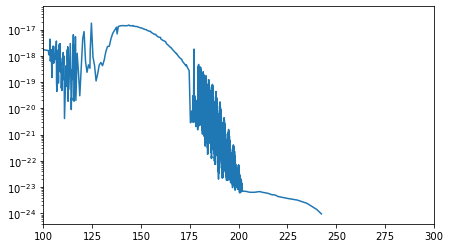

In [27]:
species = "O2"
wv, xs = np.loadtxt(species+'/'+species+'_xs.txt',skiprows=2).T

fig,ax = plt.subplots(1,1,figsize=[7,4])

ax.plot(wv,xs)
ax.set_yscale('log')

ax.set_xlim(100,300)
# ax.set_ylim(1e-30,1e-16)
plt.show()

In [28]:
1e-18/1e-23

100000.00000000001

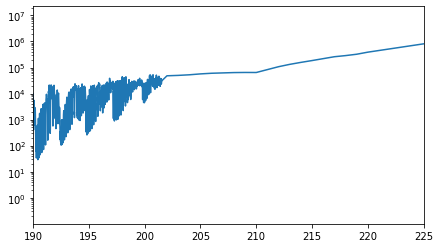

In [41]:
species = "O3"
wv1, xs1 = np.loadtxt(species+'/'+species+'_xs.txt',skiprows=2).T
xs11=np.interp(wv,wv1,xs1)
fig,ax = plt.subplots(1,1,figsize=[7,4])

ax.plot(wv,xs11/xs)
ax.set_yscale('log')

ax.set_xlim(190,225)
# ax.set_ylim(1e-19,1e-16)
plt.show()

In [34]:
ind = np.argmin(np.abs(wv-210))
ind1 = np.argmin(np.abs(wv1-210))
xs1[ind1]/xs[ind]

64414.414414414416

In [63]:


def O3_qy(wl1, tlev):
    wl = wl1*10

    xc = np.empty(3)
    om = np.empty(3)
    Ac = np.empty(3)
    nu = np.empty(2)
    xc[1-1] = 304.225
    xc[2-1] = 314.957
    xc[3-1] = 310.737
    om[1-1] = 5.576
    om[2-1] = 6.601
    om[3-1] = 2.187
    Ac[1-1] = 0.8036
    Ac[2-1] = 8.9061
    Ac[3-1] = 0.1192
    nu[1-1] = 0.
    nu[2-1] = 825.518
    cc = 0.0765

    qc = np.empty((2))

    qc[1-1] = np.exp(-nu[1-1]/(0.695*tlev))
    qc[2-1] = np.exp(-nu[2-1]/(0.695*tlev))




    # c     Main wl loop, with temperature dependence, for pathway 1
    # c     O3 + hv -> O2 + O1D


    if wl > 3800.:
        qy = 0.
    elif wl > 3400.:
        qy = cc/400.*(3800. - wl)
    elif wl > 3280.:
        qy = cc
    elif wl > 3060.:

        qy = qc[1-1]/(qc[1-1]+qc[2-1]) * \
            Ac[1-1]*np.exp(-((xc[1-1]-wl*0.1)/om[1-1])**4) +\
            qc[2-1]/(qc[1-1]+qc[2-1])*Ac[2-1]*(tlev/300.)**2 *\
            np.exp(-((xc[2-1]-wl*0.1)/om[2-1])**2) +\
            Ac[3-1]*(tlev/300)**1.5 *\
            np.exp(-((xc[3-1]-wl*0.1)/om[3-1])**2) + cc

    elif wl > 2233.:
        qy = 0.9
    elif wl >= 1788.:
        qy = 1.37e-3*wl - 2.16
    else:
        qy = 0.29

    if wl < 2010.:
        qy2 = (1.-qy)
        qy1 = 0
    else:
        qy1 = (1.-qy)
        qy2 = 0

    return qy,qy1,qy2

In [99]:
tlev = 300
wl =np.linspace(305,330,100)

qyy = []
for i in range(len(wl)):
    qy,qy1,qy2 = O3_qy(wl[i],298)
    qyy.append(qy)
    
qyy1 = []
for i in range(len(wl)):
    qy,qy1,qy2 = O3_qy(wl[i],200)
    qyy1.append(qy)


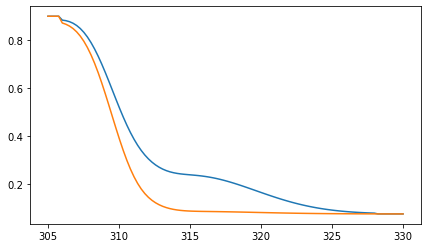

In [100]:
fig,ax = plt.subplots(1,1,figsize=[7,4])

ax.plot(wl,qyy)
ax.plot(wl,qyy1)
# ax.plot(atmos['alinc'][0],atmos['alinc'][1])

# ax.set_yscale('log')

# ax.set_ylim(1e-20,1e-16)
# ax.set_xlim(100,110)
plt.show()

In [107]:
species="O3"
folder = species

In [103]:
T = np.linspace(200,300,5)

In [ ]:
len

In [120]:
xs_file = species+"_xs.txt"
fil = open(folder+'/'+xs_file,'w')
fmt = "{:20}"
fil.write(species+" (wavelength = nm, xs = cm2/molecule)"+'\n')
fil.write(fmt.format('wavelength'))
for i in range(len(T)):
    fil.write(fmt.format('%.0f'%T[i]+'K'))
fil.write('\n')
for i in range(len(wv)):
    fil.write(fmt.format('%.8e'%wv[i]))
    for j in range(len(T)):
        fil.write(fmt.format('%.8e'%xs[j]))
    fil.write('\n')
fil.close()

In [127]:
reaction = 'O3 + hv => O1D + O2'

qy_file = reaction.replace(' ','_') + ".txt"
fil = open(folder+'/'+qy_file,'w')
fmt = "{:20}"
fil.write(qy_file+'\n')
fil.write(fmt.format('wavelength'))
for i in range(len(T)):
    fil.write(fmt.format('%.0f'%T[i]+'K'))
fil.write('\n')
for i in range(len(wv)):
    fil.write(fmt.format('%.8e'%wv[i]))
    for j in range(len(T)):
        qy,qy1,qy2 = O3_qy(wv[i],T[j])
        fil.write(fmt.format('%.8e'%qy))
    fil.write('\n')
fil.close()

In [116]:
wl

749

In [28]:
phi.neutral.branches

['NO2/O', 'NO/O2']

In [66]:
fil = open('/Users/nicholas/Downloads/SO2Cl2_Uthman(1978)_295K_190-300nm.txt','r')
lines = fil.readlines()
fil.close()

wv = []
xs = []
for line in lines[2:]:
    wv.append(float(line.split()[0]))
    xs.append(float(line.split()[1]))
    
xs = np.array(xs)
wv = np.array(wv)



In [98]:
phi.neutral.branches

['O/O2', 'O1D/O2d']

In [100]:
phi

In [130]:
mpi = MPI_Mainz('HC3N')

In [132]:
mpi.max_studies=100000

In [133]:
mpi.get_data()

In [134]:
mpi.get_atmos_data('HC3N')

In [135]:
mpi.find_best_data()

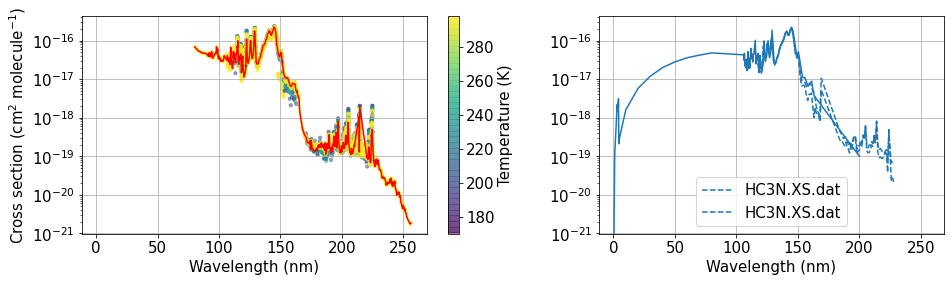

In [138]:
fig, [ax,ax1] = mpi.plot(plot_atmos = True)
# i = 4
# ax.plot(mpi.all_data['wavelength'][i],mpi.all_data['cross section'][i],'k',lw=5)

ax1.plot(wv,xs)

In [43]:
wv = mpi.all_data['wavelength'][4]
xs = mpi.all_data['cross section'][4]


In [81]:
wv = phi.neutral.data['wavelength']
xs = phi.neutral.data['cross section']

In [35]:
species="O2"
folder = species
# os.mkdir(folder)

In [36]:
xs_file = species+"_xs.txt"
fil = open(folder+'/'+xs_file,'w')
fmt = "{:20}"
fil.write(species+" (wavelength = nm, xs = cm2/molecule)"+'\n')
fil.write(fmt.format('wavelength'))
fil.write(fmt.format('300K'))
fil.write('\n')
for i in range(len(wv)):
    fil.write(fmt.format('%.8e'%wv[i]))
    fil.write(fmt.format('%.8e'%xs[i]))
    fil.write('\n')
fil.close()

In [84]:
phi.neutral.branches

['Cl/NO']

In [52]:
# phi.neutral.data['COCl/Cl']

In [85]:
reaction = 'ClNO + hv => Cl + NO'

val = 1
wv1 = [np.min(wv),np.max(wv)]
qy1 = [val,val]

wv1 = phi.neutral.data['wavelength']
qy1 = phi.neutral.data['Cl/NO']

qy_file = reaction.replace(' ','_') + ".txt"
fil = open(folder+'/'+qy_file,'w')
fmt = "{:20}"
fil.write(qy_file+'\n')
fil.write(fmt.format('wavelength'))
fil.write(fmt.format('300K'))
fil.write('\n')
for i in range(len(wv1)):
    fil.write(fmt.format('%.8e'%wv1[i]))
    fil.write(fmt.format('%.8e'%qy1[i]))
    fil.write('\n')
fil.close()

In [86]:
citation = []
citation.append({})
citation[0]['nm-range'] = ('%.4f'%np.min(wv))+" - "+('%.4f'%np.max(wv))
citation[0]['citation'] = 'Huebner and Mukherjee (2015)'
citation[0]['DOI'] = '10.1016/j.pss.2014.11.022'
# citation[0]['citation'] = 'Uthman (1978)'
# citation[0]['DOI'] = '10.1021/j100509a021'

meta = {}
meta[species] = {}
meta[species]['reactions'] = {}
# reaction = 'COCl2 + hv => ClCO + Cl'
meta[species]['reactions'][reaction] = {}
meta[species]['reactions'][reaction]['citations'] = citation.copy()

# reaction = 'HO2NO2 + hv => OH + NO3'
# meta[species]['reactions'][reaction] = {}
# meta[species]['reactions'][reaction]['citations'] = citation.copy()


# citation = []
# citation.append({})
# citation[0]['nm-range'] = ('%.2f'%np.min(wv))+" - "+('%.2f'%np.max(wv))
# citation[0]['citation'] = 'Fahr and Nayak (1996)'
# citation[0]['DOI'] = '10.1016/0301-0104(95)00401-7'

meta[species]['xsections'] ={}
meta[species]['xsections']['citations'] = citation.copy()

meta[species]['general-notes'] = None

fil = open('tmp_meta.yaml','w')
yaml.dump(meta,fil)
fil.close()

In [13]:
mpi.find_best_data()

In [21]:
np.where(mpi.best_data['wavelength']==228.31)

(array([612]),)

# Converting Kevin Zahnle's cross sections

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ruamel.yaml import YAML
yaml = YAML(typ='safe')

In [2]:
fil = open("Zahnle_Kevin_data/photo_new_new.dat")
lines = fil.readlines()
fil.close()

fil = open("Zahnle_Kevin_data/SW_new_new.DAT")
lines_sw = fil.readlines()
fil.close()

inds = [1, 158, 196, 267, 396]
num = []
wav = []
wav_av = []
for line in lines[inds[0]+1:]:
    if line == '\n':
        break
    num.append(int(line.split()[0]))
    wav.append([float(a) for a in line.split()[1].split('-')])
    wav_av.append(np.mean(wav[-1])/10)

In [3]:
#H2S
sp = 'CS2'
xs_lw = 11*[0.]+[1.e-20, 1.5e-20, 2.5e-20, 4.e-20, 7.e-20]+\
[8.e-20, 7.5e-20, 5.e-20, 2.5e-20, 2.e-20, 1.e-20]+ 51*[0.0]

xs = 7*[0.]+[7.e-17,9.0e-17,1.2e-16,2.0e-16,4.0e-16]+\
3*[4.5E-16]+[2.5E-16, 1.5E-16, 1.0e-16, 5.0e-17, 3.0e-17]+\
15*[0.0]

xs = xs+xs_lw

wav_save = wav_av[:len(xs)]

In [ ]:
sp = 'SO2'

i = -1

paths = ['so2(so+0)',    'so2(1so2)',    's02(3so2)']

xs = [0 for i in range(68)]
for path in paths[:-1]:

    ind = lines[inds[i]-1].split().index(path)+1

    for j,line in enumerate(lines[inds[i]+1:]):
        if line == '\n':
            break
        xs[j]+=float(line.split()[ind])

wav_save = wav_av[:len(xs)]


In [486]:
sp = 'S8L'
xs_tot = [1.E-18,1.E-18]
wav_tot = [wav_av[0],wav_av[-1]]

In [562]:
# N2
sp = 'N2'
xs_tot = 14*[0.]+[1.e-17,2.5e-16,1.e-17]
xs_tot = xs_tot[::-1]
wav_tot = wav_sw[:len(xs)]

In [ ]:
#CO
sp = 'CO'
xs_tot = 14*[0.]+3*[1.e-17]
xs_tot = xs_tot[::-1]
wav_tot = wav_sw[:len(xs)]

In [710]:
# HS
sp = 'HS'
xs_tot = 45*[0]+[3.e-18, 5.e-19, 1.e-17, 1.6e-17, 1.5e-18, 6.e-19,\
     7.e-17, 3.e-17, 2.e-18, 2.e-19, 3.e-20,\
     1.e-20,2.e-19,1.e-20,4.e-22, 2.e-21, 5.e-22, 5.e-23,\
     8.e-24, 8.e-24, 4.e-24, 1.e-24, 0.]

wav_tot = wav_av[:len(xs)]


In [707]:
len(xs_tot)

68

In [4]:
sp = 'CO2'

i = 1
try:
    ind = lines[inds[i]-1].split().index(sp)-1

    xs = []
    for line in lines[inds[i]+1:]:
        if line == '\n':
            break
        xs.append(float(line.split()[ind]))

    wav_save = wav_av[:len(xs)]
except:
    print('no lw data')
    xs = []
    wav_save = []

In [5]:
# search short wavlength

sp1 = sp

try:
    ind = lines_sw[0].split().index(sp1)
    
    wav_sw = []
    for line in lines_sw[2:]:
        wav_sw.append(float(line.split()[-1])/10)

    wav_sw = wav_sw[::-1]

    xs_sw = []
    for line in lines_sw[2:]:
        xs_sw.append(float(line.split()[ind]))

    xs_sw = xs_sw[::-1]

    # knit together
    wav_tot = wav_sw+wav_save
    xs_tot = xs_sw+xs

except:
    print('no sw data')
    wav_tot = wav_save
    xs_tot = xs

    

In [7]:
sp1 = sp
fil=open('../xsections'+'/'+sp1+'/'+sp1+'_xs.txt')
lines_old = fil.readlines()
fil.close()

xs_old = []
wav_old = []
for line in lines_old[2:]:
    xs_old.append(float(line.split()[1]))
    wav_old.append(float(line.split()[0]))


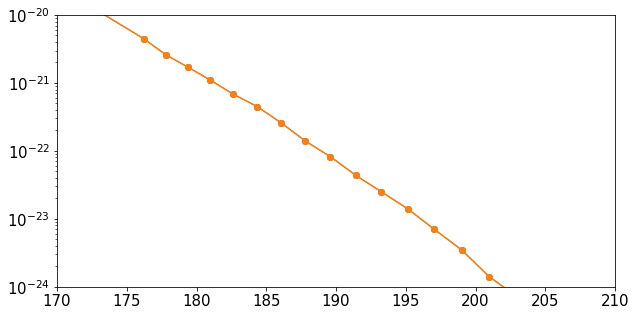

In [8]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize = [10,5])

ax.plot(wav_tot,xs_tot,'o-',lw=1)
ax.plot(wav_old,xs_old,'o-')

ax.set_xlim(170,210)
ax.set_ylim(1e-24,1e-20)

ax.set_yscale('log')


plt.show()

'HS'

In [51]:
import subprocess
subprocess.call('mkdir '+sp,shell=True)

fil = open(sp+'/'+sp+'_xs.txt','w')
fil.write(sp+' (wavelength = nm, xs = cm2/molecule)\n')
fil.write('wavelength          300K                \n')

for i in range(len(wav_tot)):
    fil.write('{:20}'.format('%.8e'%wav_tot[i]))
    fil.write('{:20}'.format('%.8e'%xs_tot[i])+'\n')

fil.close()

In [9]:
fil = open('Zahnle_Kevin_data/zahnle_earth_photos.yaml','r')
rxs = yaml.load(fil)
fil.close()


In [10]:
paths = []
for rx in rxs:
    if rx['equation'].split()[0]==sp:
        paths.append(rx['equation'])
qy_names = []
for path in paths:
    qy_names.append(path.replace(' ','_')+'.txt')
    
print(qy_names)

['CO2_+_hv_=>_CO_+_O.txt', 'CO2_+_hv_=>_CO_+_O1D.txt']


In [54]:

i = 1

fil = open(sp+'/'+qy_names[i],'w')
fil.write(qy_names[i]+'\n')
fil.write('wavelength          300K                \n')

# for i in range(len(wav_tot)):

fil.write('{:20}'.format('%.8e'%wav_tot[0]))
fil.write('{:20}'.format('%.8e'%(1.00))+'\n')

fil.write('{:20}'.format('%.8e'%wav_tot[-1]))
fil.write('{:20}'.format('%.8e'%(1.00))+'\n')

fil.close()

In [11]:

import os
photospec = []
for rx in rxs:
    photospec.append(rx['equation'].split()[0])


directories = [a for a in os.listdir() if os.path.isdir(a) and a[0]!='.']
try:
    directories.remove('__pycache__')
except:
    pass

set(photospec).symmetric_difference(set(directories))

{'HNO', 'HNO2', 'Zahnle_Kevin_data'}